# LAB 4 Group 5

Project By

  Siddhesh Dwarkanath Munagekar : 0747944





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Machine_learning_2/LAB4/vehicles_2013.csv')
data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [ ]:
print("50% of data",len(data)/2,"rows")

50% of data 581.0 rows


# Visualizing the dataset using Heat map and Highlighting the missing values across the columns

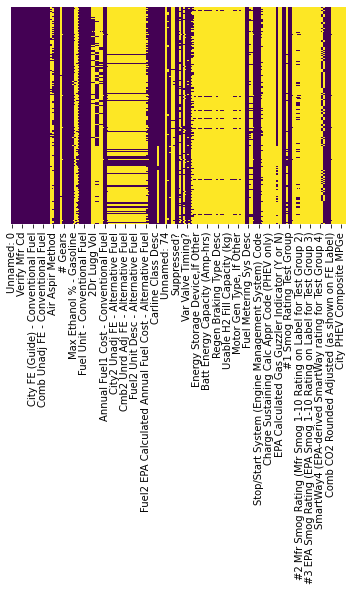

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')



Goal is to reduce the yellow colour which represents missing values

# Keeping a threshold of 50 % for missing values and dropping those columns whose total missing values are greater than the 50 %threshold

In [ ]:
column_list= data.columns
data.isnull().sum()
len(column_list)
count =1
#Dropping the column which has more than 50 % of missing data
for i in column_list:
  total_null_val=data[i].isnull().sum()
  
  if total_null_val > len(data)/2:    
    data=data.drop(i,axis=1)
    print(count," Column droped & Total Null Values :  " , i ,  total_null_val)
    count +=1
    
print(" ")
print("Total Columns droped from dataset :",count -1)
#Comb Unadj FE - Conventional Fuel

1  Column droped & Total Null Values :   Guzzler?  1081
2  Column droped & Total Null Values :   Air Aspir Method 801
3  Column droped & Total Null Values :   Trans, Other 1153
4  Column droped & Total Null Values :   Max Biodiesel % 1145
5  Column droped & Total Null Values :   Range1 - Model Type Driving Range - Conventional Fuel 1003
6  Column droped & Total Null Values :   2Dr Pass Vol 965
7  Column droped & Total Null Values :   2Dr Lugg Vol 965
8  Column droped & Total Null Values :   4Dr Pass Vol 721
9  Column droped & Total Null Values :   4Dr Lugg Vol 721
10  Column droped & Total Null Values :   Htchbk Pass Vol 1055
11  Column droped & Total Null Values :   Htchbk Lugg Vol 1055
12  Column droped & Total Null Values :   City2 FE (Guide) - Alternative Fuel 1004
13  Column droped & Total Null Values :   Hwy2 Fuel FE (Guide) - Alternative Fuel 1004
14  Column droped & Total Null Values :   Comb2 Fuel FE (Guide) - Alternative Fuel 1004
15  Column droped & Total Null Values :   Cit

In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 68 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                 1162 non-null   int64  
 1   Model Year                                                                                                 1162 non-null   int64  
 2   Mfr Name                                                                                                   1162 non-null   object 
 3   Division                                                                                                   1162 non-null   object 
 4   Carline                                                                 

(1162, 68)

 

*   Excluding the Description as it is redundant since we have one more column with its shortform
*   City , Hwy and MPG features as noted in LAB instruction needs to be removed



In [ ]:
#
data=data.rename(columns={"Descriptor - Model Type (40 Char or less)":"Model_type"})
data=data.rename(columns={"Air Aspiration Method Desc":"Air Aspiration Method"})
data=data.rename(columns={"Drive Desc":"Drive"})
data=data.rename(columns={"Calc Approach Desc":"Calc Approach"})

#Excluding Description Columns which are redundant
data=data.loc[:,~data.columns.str.contains('Desc')]

#Excluding Columns which contains City
data=data.loc[:,~data.columns.str.contains('^city',case=False)]

#Excluding Columns which contains Highway
data=data.loc[:,~data.columns.str.contains('^Hwy',case=False)]

#Excluding Columns which contains MPG
data=data.loc[:,~data.columns.str.contains('MPG',case =False)]

data.shape

(1162, 51)

## Normalizing the  dataframe using the function which will convert strings to lower case and replaceing blank and ?? with nan

In [ ]:
#Normalize the strings in data frame ,converting strings to lower case and replaceing blank and ?? with nan

from pandas.api.types import is_string_dtype, is_object_dtype

def df_normalize_strings(data):
    for col in data.columns:
        if is_string_dtype(data[col]) or is_object_dtype(data[col]):
            data[col] = data[col].str.lower()
            data[col] = data[col].fillna(np.nan)
            data[col] = data[col].replace('', np.nan)
            data[col]=  data[col].replace('??',np.nan)
df_normalize_strings(data)

By doing normalization all the charaters are now in lower case and blanks ,?? are replaced by nan

In the below code ,

*   **Unnamed: 0** is droped as it was incrementing like index after each row which make no sense to keep in data as it will mislead,
   
*  **Model_Year** 2013 was observed to be repeated across the entire dataset so this column was discarded 

*    **Model_type** Contained Comments so it was droped from analysis.





In [ ]:
#Droping the columns as per above mnetioned reasons

data=data.drop(['Unnamed: 0' ,'Model Year','Model_type'],axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 48 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   Mfr Name                                                                                                   1162 non-null   object 
 1   Division                                                                                                   1162 non-null   object 
 2   Carline                                                                                                    1162 non-null   object 
 3   Verify Mfr Cd                                                                                              1162 non-null   object 
 4   Index (Model Type Index)                                                

Seperating our Target Feature Comb Unadj FE from the list of predictors

mod values were observed in the Comb_Unadj_FE_CF feature ,which need to be converted to not a number (nan) values

In [ ]:
#Replacing mod with nan
y=data[['Comb Unadj FE - Conventional Fuel']]
print(y[y['Comb Unadj FE - Conventional Fuel'].eq('mod')])
y['Comb Unadj FE - Conventional Fuel']= y['Comb Unadj FE - Conventional Fuel'].replace('mod',np.nan)


     Comb Unadj FE - Conventional Fuel
237                                mod
238                                mod
401                                mod
402                                mod
410                                mod
411                                mod
418                                mod
422                                mod
701                                mod
743                                mod
744                                mod
1083                               mod
1145                               mod
1156                               mod


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Data type of y target was converted from string to float and Comb_Unadj_FE_CF was droped from predictor data 

In [ ]:
#Converting  Y  feature data type to int

y=y.astype(float)

print("mean of Comb Unadj FE - Conventional Fuel ",np.mean(y['Comb Unadj FE - Conventional Fuel']))

###Dropping Comb_Unadj_FE_CF from data (X_features)
data=data.drop('Comb Unadj FE - Conventional Fuel',axis=1)

y['Comb Unadj FE - Conventional Fuel'].dtype

mean of Comb Unadj FE - Conventional Fuel  29.183907491289187


dtype('float64')

**Histogram** is plotted to understand the distribution of Comb_Unadj_FE_CF feature across the data.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histogram of Comb Unadj FE - Conventional Fuel ')

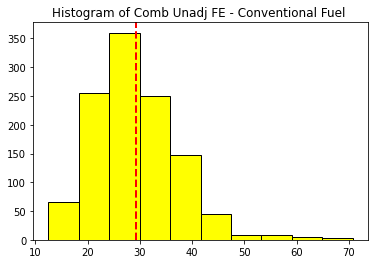

In [ ]:
plt.hist(y['Comb Unadj FE - Conventional Fuel'],color='yellow', edgecolor='black')
plt.axvline(x=np.mean(y['Comb Unadj FE - Conventional Fuel']), color='r', linestyle='dashed', linewidth=2)
plt.title("Histogram of Comb Unadj FE - Conventional Fuel ")

Since the histogram of target variable 'Comb_Unadj_FE_CF' is Normally ditributed with mean being the measure of central tendency.Hence we will replace nan values with  average **29.18**

In [ ]:
#Replacing Nan values with mean of Comb_Unadj_FE_CF
print("Nan values before replacement",y['Comb Unadj FE - Conventional Fuel'].isnull().sum())

y['Comb Unadj FE - Conventional Fuel']=np.where(y['Comb Unadj FE - Conventional Fuel'].isna(), 29.18 ,y['Comb Unadj FE - Conventional Fuel'])

print("Nan values after replacement",y['Comb Unadj FE - Conventional Fuel'].isnull().sum())

Nan values before replacement 14
Nan values after replacement 0


## data_info Function
Creating a data_info function to have a quick over view on some of the important parameters of the features such as dtypes , percentage of missing values in the data , total number of unique values and unique values itself.

In [ ]:
def data_info(data):
  with pd.option_context("display.max_colwidth",20):
    info=pd.DataFrame()
    
    info['data type']=data.dtypes
    info['precent missing']=data.isnull().sum()*100/len(data)
    info['No of Unique']=data.apply(lambda x:len(x.unique()))
    info['Unique Values']=data.apply(lambda x: x.unique())
    return info.sort_values('data type')


In [ ]:
data_info(data)

data type  \
Intake Valves Per Cyl                                                                                         int64   
EPA FE Label Dataset ID                                                                                       int64   
Carline Class                                                                                                 int64   
Exhaust Valves Per Cyl                                                                                        int64   
Annual Fuel1 Cost - Conventional Fuel                                                                         int64   
# Gears                                                                                                       int64   
Comb FE (Guide) - Conventional Fuel                                                                           int64   
Comb CO2 Rounded Adjusted (as shown on FE Label)                                                              int64   
# Cyl                                                                                                         int64   
Index (Model Type Index)                                                                                      int64   
Comb Unrd Adj FE - Conventional Fuel                                                                        float64   
Eng Displ                                                                                                   float64   
$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label)                     float64   
Max Ethanol % - Gasoline                                                                                    float64   
Suppressed?                                                                                                  object   
Police/Emerg?                                                                                                object   
Cyl Deact?                                                                                                   object   
Var Valve Timing?                                                                                            object   
Var Valve Lift?                                                                                              object   
Camless Valvetrain (Y or N)                                                                                  object   
Label Recalc?                                                                                                object   
Oil Viscosity                                                                                                object   
Stop/Start System (Engine Management System) Code                                                            object   
FE Rating (1-10 rating on Label)                                                                             object   
GHG Rating (1-10 rating on Label)                                                                            object   
#1 Smog Rating Test Group                                                                                    object   
#1 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 1)                                          object   
Fuel Metering Sys Cd                                                                                         object   
Unique Label?                                                                                                object   
Calc Approach                                                                                                object   
Release Date                                                                                                 object   
Air Aspiration Method                                                                                        object   
Trans                                                                                                        object   
Lockup Torque Converter                                     

#Handeling EPA Column

There were 3 jargon comments in EPA column which were handeled by replacing it with 0 values and then the feture was converted into integer data type.

In [ ]:
#Operation on EPA column

data=data.rename(columns={"EPA Calculated Annual Fuel Cost - Conventional Fuel -----  Annual fuel cost error. Please revise Verify. ":"EPA"})

data['EPA']=data['EPA'].replace('c 300 4matic is available as pzev and ffv version in my 2013. litmus test requires 3 cycle method for the pzev version while the ffv version can be labeled using derived 5 cycle method. mercedes has chosen not to use the 3-cycle method for both test groups. update 10/08/2014: relabel due to epa confirmatory testing (c/d).', 0)
data['EPA']=data['EPA'].replace('update 10/08/2014: relabel due to epa confirmatory testing (c/d).',0)
print("Total number of null values",data['EPA'].isnull().sum())

data['EPA']=data['EPA'].astype(int)


Total number of null values 0


Text(0.5, 1.0, 'Histogram of EPA')

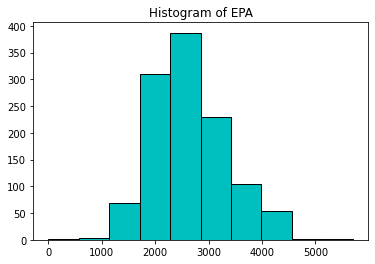

In [ ]:
plt.hist(data['EPA'],edgecolor='black',color='c' )
plt.title("Histogram of EPA")

Replacing two misssing values with 0 didnt affected the distribution of EPA feature histogram

In [ ]:
#Handling the missing values
data.isnull().sum().sort_values(ascending=False)

$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label)     435
Car/Truck Category - Cash for Clunkers Bill.                                                400
Unique Label?                                                                                81
Max Ethanol % - Gasoline                                                                     18
Label Recalc?                                                                                18
Comb CO2 Rounded Adjusted (as shown on FE Label)                                              0
# Gears                                                                                       0
Fuel Usage  - Conventional Fuel                                                               0
Drive                                                                                         0
Drive Sys                                                                                     0
Trans Creeper Gear                      

Now lets target to fill missing values in top 5 features.

## Creating a for loop for creating a list of string features which has unique values less than 6 to find the relation ship.

In [ ]:
#Considering string features having unique values less than 6
data=data.rename(columns={"Car/Truck Category - Cash for Clunkers Bill.":"Car_Truck_category"})
data=data.rename(columns={"$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label) ":"Amount_spent_over_5yrs"})
data=data.rename(columns={"Var Valve Timing?":"Var_Valve_Timing"})
data=data.rename(columns={"Gas Guzzler Exempt (Where Truck = 1975 NHTSA truck definition)":"Gas_Guzzler_Exempt"})

col_list=[]
for col in data.columns:
  if is_string_dtype(data[col]):
    if len(data[col].unique())<6:
      col_list.append(col)


In [ ]:
col_list

['Air Aspiration Method',
 'Lockup Torque Converter',
 'Trans Creeper Gear',
 'Drive Sys',
 'Drive',
 'Fuel Unit - Conventional Fuel',
 'Gas_Guzzler_Exempt',
 'Car_Truck_category',
 'Calc Approach',
 'Unique Label?',
 'Label Recalc?',
 'Suppressed?',
 'Police/Emerg?',
 'Cyl Deact?',
 'Var_Valve_Timing',
 'Var Valve Lift?',
 'Fuel Metering Sys Cd',
 'Camless Valvetrain (Y or N)',
 'Stop/Start System (Engine Management System) Code']

#Handeling Amount_spent_over_5yrs continuous feature

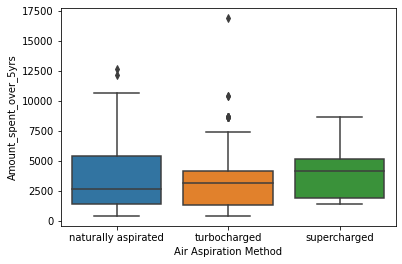

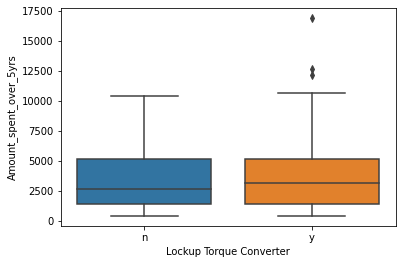

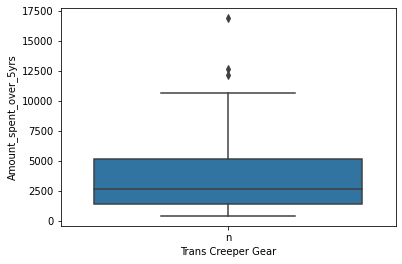

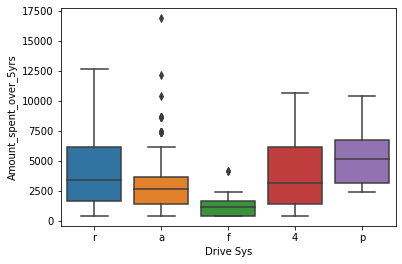

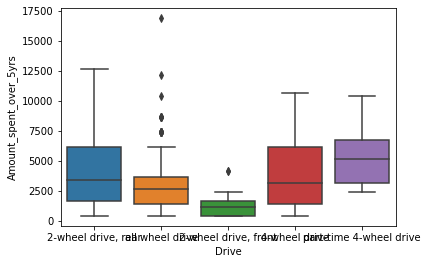

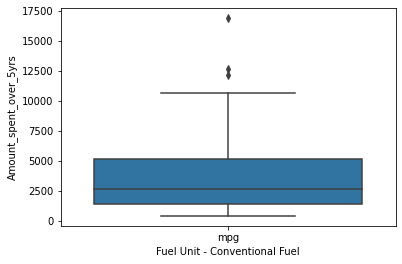

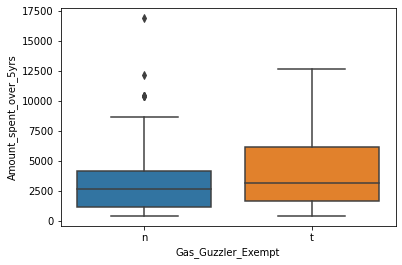

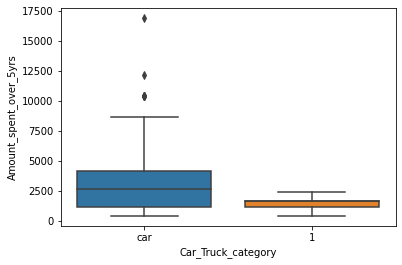

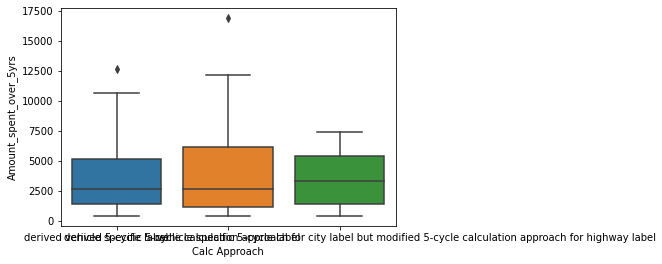

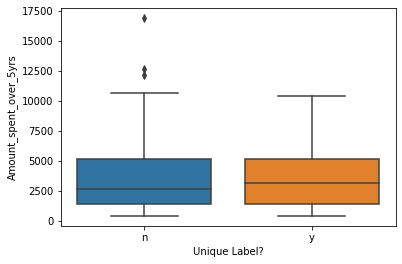

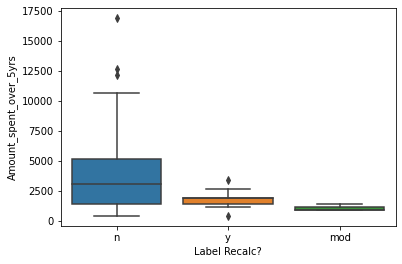

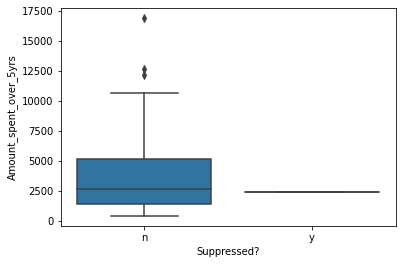

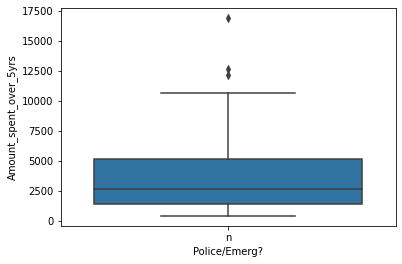

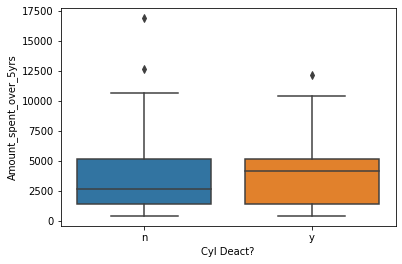

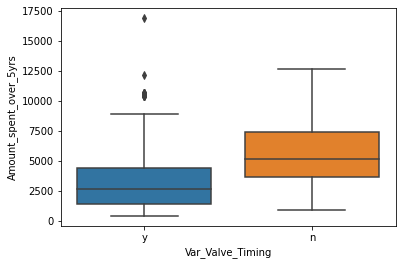

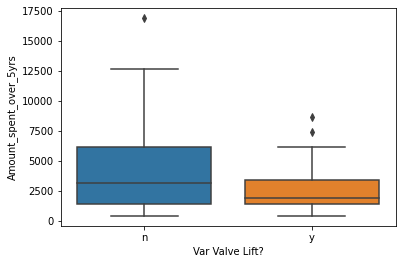

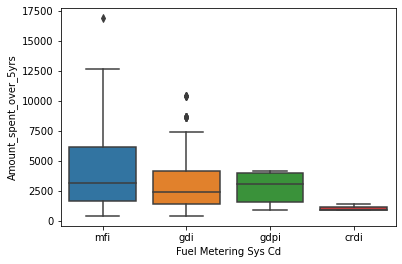

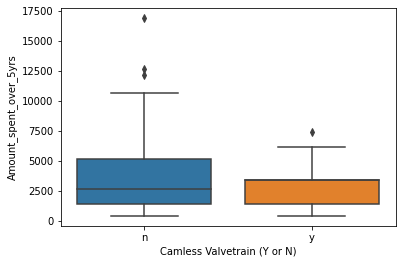

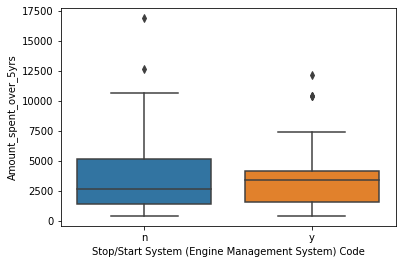

In [ ]:
#Finding the relationship of Amount_spent_over_5yrs with multiple categorical features 

data.columns
for i in col_list:
  plt.figure()
  sns.boxplot(x=i,y='Amount_spent_over_5yrs', data=data)
  

By comparing with multiple internal feature relationship ,finally we are selecting Var_val_timing feature to predict missing values of Amount_spent_over_5yrs.....So when Var_val_timing is **y** Amount_spent_over_5yrs is **2500** and when Var_val_timing is **n** Amount_spent_over_5yrs is **5000** in most of the cases as represented by median line of box plot

In [ ]:
def fill_amount_spent(cols):
  Amount_spent_over_5yrs=cols[0]    #first Column to be filled
  Var_Valve_Timing=cols[1]          #second Column for relationship
           
  if pd.isnull(Amount_spent_over_5yrs):

    if Var_Valve_Timing is 'n':
      return 5000
    else:
      return 2500
  else:
    return Amount_spent_over_5yrs


##Filling up the missing values by as per above function by passing two columns

In [ ]:
data['Amount_spent_over_5yrs']=data[['Amount_spent_over_5yrs','Var_Valve_Timing']].apply(fill_amount_spent,axis=1)
data['Amount_spent_over_5yrs'].isnull().sum()

0

# Handeling categorical feature Car_Truck_category

Converting Car_Truck_category dtype from string to category
In the below chunk {1: 'car',  -1: 'NaN',  0 : '1'} .Hence we will add 1 so that car =2, Nan =0, '1'= 1

In [ ]:
data['Car_Truck_category']=data['Car_Truck_category'].astype('category').cat.as_ordered()
default_cat_code=data['Car_Truck_category'].cat.codes.unique()
print(default_cat_code)
data['Car_Truck_category'].unique()
data['Car_Truck_category']=data['Car_Truck_category'].cat.codes +1
data['Car_Truck_category'].unique()


[ 1 -1  0]


array([2, 0, 1], dtype=int8)

#Creating functions  to convert all the string columns into categories and then label encoding with categorical codes.

In [ ]:

from pandas.api.types import is_categorical_dtype, is_string_dtype
####This Function will convert string columns to category datatype columns
def df_string_to_cat(data):
    for col in data.columns:
        if is_string_dtype(data[col]):
            data[col] = data[col].astype('category').cat.as_ordered()

####This Function will convert categorical columns to category codes
def df_cat_to_catcode(data):
    for col in data.columns:
        if is_categorical_dtype(data[col]):
            data[col] = data[col].cat.codes + 1

Visualizing the data again for missing values

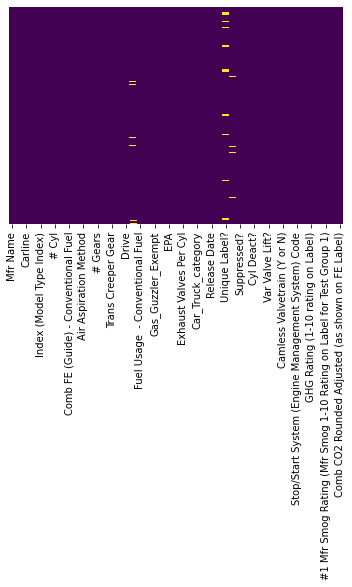

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Handeling  string Unique Label  & string  Label_Recalc features

In [ ]:
#Convering String to categorical features and encoding them with cat codes thus filling the remianing missing values
df_string_to_cat(data)
df_cat_to_catcode(data)

data.isnull().sum().sort_values(ascending=False)

Max Ethanol % - Gasoline                                               18
Comb CO2 Rounded Adjusted (as shown on FE Label)                        0
Trans                                                                   0
Gas_Guzzler_Exempt                                                      0
Fuel Unit - Conventional Fuel                                           0
Fuel Usage  - Conventional Fuel                                         0
Drive                                                                   0
Drive Sys                                                               0
Trans Creeper Gear                                                      0
Lockup Torque Converter                                                 0
# Gears                                                                 0
Air Aspiration Method                                                   0
EPA                                                                     0
Comb Unrd Adj FE - Conventional Fuel  

# Handeling the numeric column Max_Ethanol_gasoline

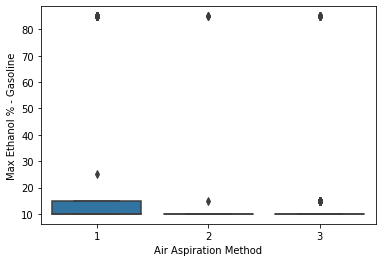

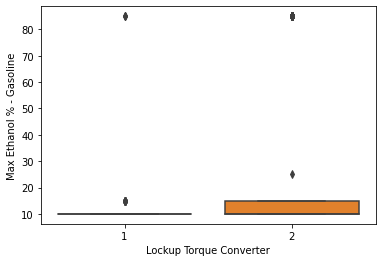

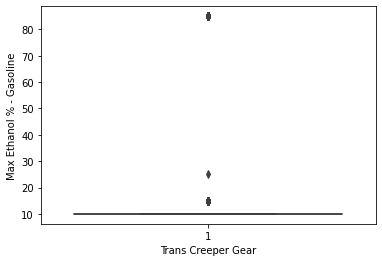

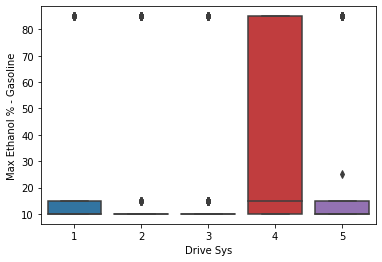

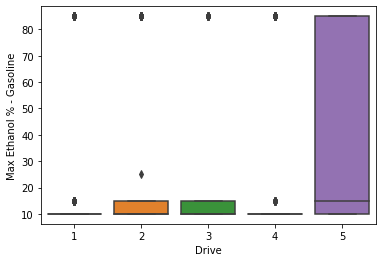

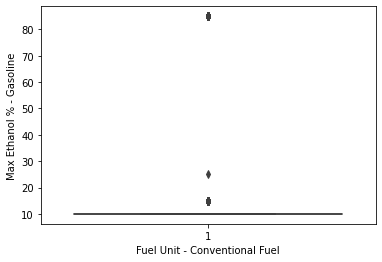

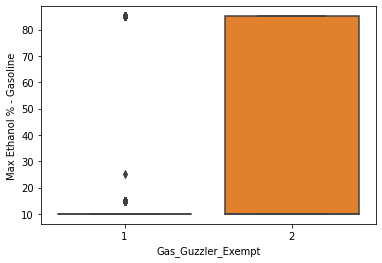

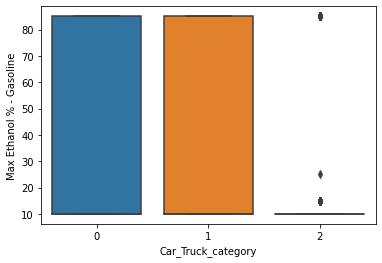

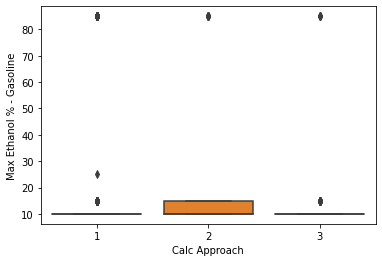

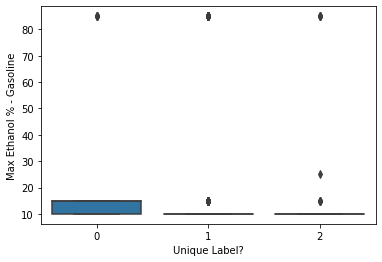

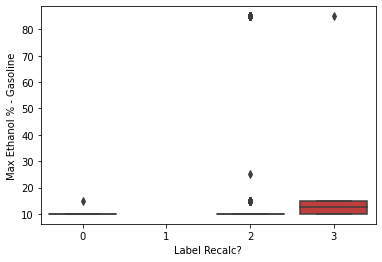

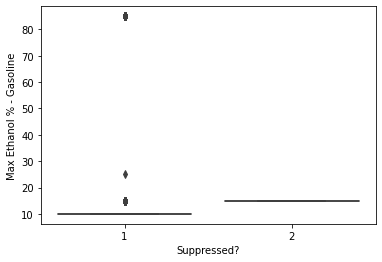

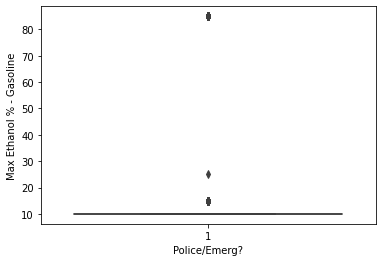

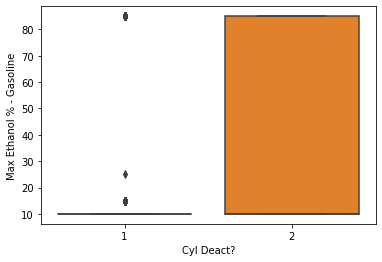

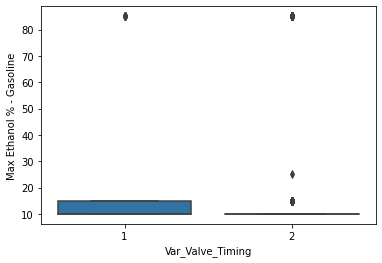

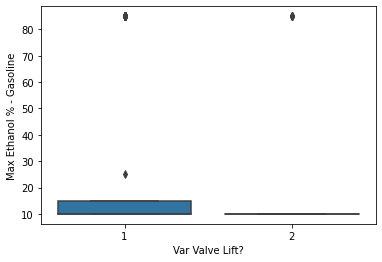

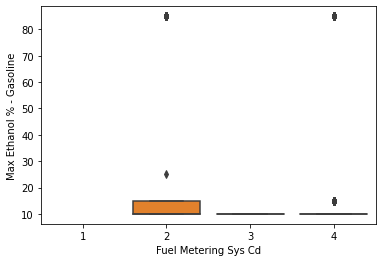

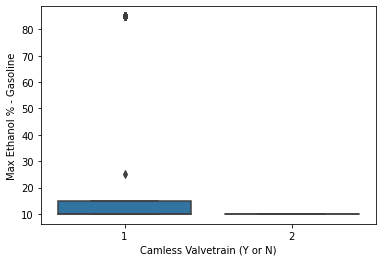

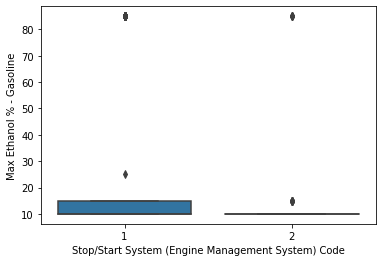

In [ ]:
#Creating a for loop to analyse the relationship of differnt categorical features  with Max_ethanol_gasoline


for i in col_list:
  plt.figure()
  sns.boxplot(x=i,y='Max Ethanol % - Gasoline', data=data)



##Considering Gas_Guzzler_Exempt as relationship for filling missing values
When Gas_Guzzler_Exempt is 1 then Max_Ethanol_gasoline is 10 and when Gas_Guzzler_Exempt is 2 Max_Ethanol_gasoline is 85. So replacing the values accordingly.

In [ ]:
def fill_max_ethanol_gasoline(cols):
  Max_Ethanol_gasoline=cols[0]    #first Column to be filled
  Gas_Guzzler_Exempt=cols[1]          #second Column for relationship
           
  if pd.isnull(Max_Ethanol_gasoline):

    if Gas_Guzzler_Exempt == 2:
      return 85
    else:
      return 10
  else:
    return Max_Ethanol_gasoline

In [ ]:
#Fills the missing values by calling above mentioned function
data['Max Ethanol % - Gasoline']=data[['Max Ethanol % - Gasoline','Gas_Guzzler_Exempt']].apply(fill_max_ethanol_gasoline , axis =1)

# Overview of missing values

In [ ]:
data.isnull().sum().sort_values(ascending =False)

Comb CO2 Rounded Adjusted (as shown on FE Label)                       0
Trans                                                                  0
Gas_Guzzler_Exempt                                                     0
Fuel Unit - Conventional Fuel                                          0
Fuel Usage  - Conventional Fuel                                        0
Max Ethanol % - Gasoline                                               0
Drive                                                                  0
Drive Sys                                                              0
Trans Creeper Gear                                                     0
Lockup Torque Converter                                                0
# Gears                                                                0
Air Aspiration Method                                                  0
EPA                                                                    0
Comb Unrd Adj FE - Conventional Fuel               

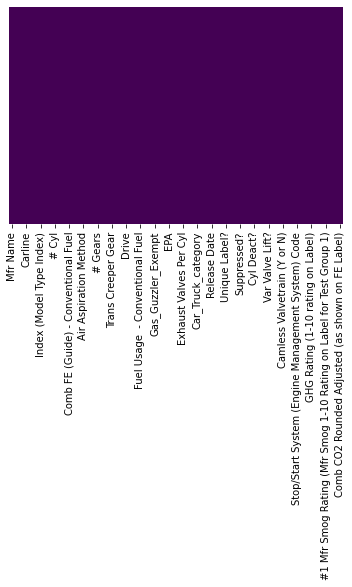

In [ ]:
#Below Visualization suggest zero missing values
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Preparing X_ feature (2 D array) and y_target (1 D array)ready to fit model.

In [ ]:
X_features= data
y_target=y['Comb Unadj FE - Conventional Fuel']

print("Shape of X_feature ",X_features.shape)
print("Shape of y_target",y_target.shape)

Shape of X_feature  (1162, 47)
Shape of y_target (1162,)


# X_features 

In [ ]:
#X_feature in Dataframe format
print(X_features.shape)
X_features

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#y feature in data frame format
y

Comb Unadj FE - Conventional Fuel
0                               20.5806
1                               19.4895
2                               20.5806
3                               19.4895
4                               33.3217
5                               34.1594
6                               34.7741
7                               25.1480
8                               27.8550
9                               25.1480
10                              12.4782
11                              23.1279
12                              25.1272
13                              21.3022
14                              22.9951
15                              18.3593
16                              18.6649
17                              18.3593
18                              18.6649
19                              16.7215
20                              17.0002
21                              51.1079
22                              46.0738
23                              16.2581
24                              14.4817
25                              19.2760
26                              17.2308
27                              19.1970
28                              16.0722
29                              30.5716
30                              32.3665
31                              31.2651
32                              26.2244
33                              23.9360
34                              21.2822
35                              34.7416
36                              34.3574
37                              31.6963
38                              28.7243
39                              19.3077
40                              19.3238
41                              19.3238
42                              19.3077
43                              50.3087
44                              50.3087
45                              40.0405
46                              40.6302
47                              41.4358
48                              43.6396
49                              40.0405
50                              40.6302
51                              39.0466
52                              39.3135
53                              39.0466
54                              39.3135
55                              38.1433
56                              39.3135
57                              39.3135
58                              39.0466
59                              39.3135
60                              28.1897
61                              26.9282
62                              26.7443
63                              26.1024
64                              33.6298
65                              31.1731
66                              31.5932
67                              29.5284
68                              17.7954
69                              19.4000
70                              19.8313
71                              20.1117
72                              40.0220
73                              41.3505
74                              46.2893
75                              41.3505
76                              24.0710
77                              22.6216
78                              22.3008
79                              23.3026
80                              28.6199
81                              27.4150
82                              25.9132
83                              25.1515
84                              41.4358
85                              43.6396
86                              40.0405
87                              40.6302
88                              39.0466
89                              39.3135
90                              39.0466
91                              39.3135
92                              39.0466
93                              39.3135
94                              39.0466
95                              39.3135
96                              30.3389
97                              28.5822
98                              29.9192
99    

In [ ]:
#commented below code for the purpose of this lab 
###Tested model performance and received train score of 0.99816 and test score of  0.99415

#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test =train_test_split(X_features,y_target)


#from sklearn.ensemble import RandomForestRegressor
#random_frst=RandomForestRegressor(n_estimators=100)
#random_frst.fit(X_train,y_train)
#print("Train Score",random_frst.score(X_train,y_train))
#print("test Score",random_frst.score(X_test,y_test))

**Reference** for Cleaning the data set were taken from Prof. Mark mentioned notebooks which helped in achieving objective of this lab